# 영상 입력 다층 퍼셉트론 
* 영상을 입력해서 이진 분류할 수 있는 모델 생성 
* MNIST를 이용하여 홀수 / 짝수 구분 

### 사용할 패키지 선언 

In [11]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

* 이미지 크기 

In [2]:
width = 28
height = 28

### 1. 데이터셋 생성하기
- 초기 라벨값은 0에서 9까지 정수로 지정
- 데이터 정규화를 위해서 255.0으로 나눔

#### 훈련셋과 시험셋 불러오기

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width*height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width*height).astype('float32') / 255.0

#### 훈련셋과 검증셋 분리

In [5]:
x_train = x_train[:50000]
y_train = y_train[:50000]
x_val = x_train[50000:]
y_val = y_train[50000:]

#### 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환

In [6]:
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

### 2. 모델 구성하기

In [8]:
model = Sequential()
model.add(Dense(256, input_dim=width*height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 332,801
Trainable params: 332,801
Non-trainable params: 0
_________________________________________________________________


### 3. 모델 학습과정 설정하기

In [9]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4.모델 학습시키기

In [10]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Epoch 1/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.2950 - accuracy: 0.8821 - val_loss: 0.1536 - val_accuracy: 0.9491
Epoch 2/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.1256 - accuracy: 0.9548 - val_loss: 0.1009 - val_accuracy: 0.9662
Epoch 3/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0883 - accuracy: 0.9688 - val_loss: 0.0807 - val_accuracy: 0.9736
Epoch 4/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0708 - accuracy: 0.9751 - val_loss: 0.0731 - val_accuracy: 0.9743
Epoch 5/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0591 - accuracy: 0.9791 - val_loss: 0.0656 - val_accuracy: 0.9770
Epoch 6/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0503 - accuracy: 0.9832 - val_loss: 0.0639 - val_accuracy: 0.9775
Epoch 7/30
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0441 - accuracy: 0.9851 - val_loss: 0.0620 - val_accuracy:

### 5. 학습과정 살펴보기

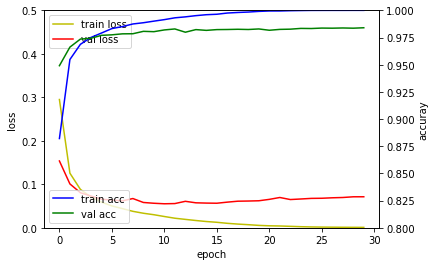

In [26]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()                                        # loss_ax와 함께 acc_ax 그래프 같이 표현 

# loss 에 대한 그래프 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')     # 노란색 선 
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')   # 빨간색 선 
loss_ax.set_ylim([0.0, 0.5])                                    # Y축 값 

# acc 에 대한 그래프 
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')   # 파란색 선 
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc') # 녹색 선 
acc_ax.set_ylim([0.8, 1.0])

# x, y 축에 라벨 붙이기 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

# 범례 보이기 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [33]:
loss, metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ', loss)
print('metrics : ', metrics)

313/313 [==============================] - 0s 679us/step - loss: 0.0608 - accuracy: 0.9860
loss :  0.06078178808093071
metrics :  0.9860000014305115


### 7. 모델 사용하기

In [34]:
yhat_test = model.predict(x_test, batch_size=32)

### 데이터 셋 일부 확인하기 

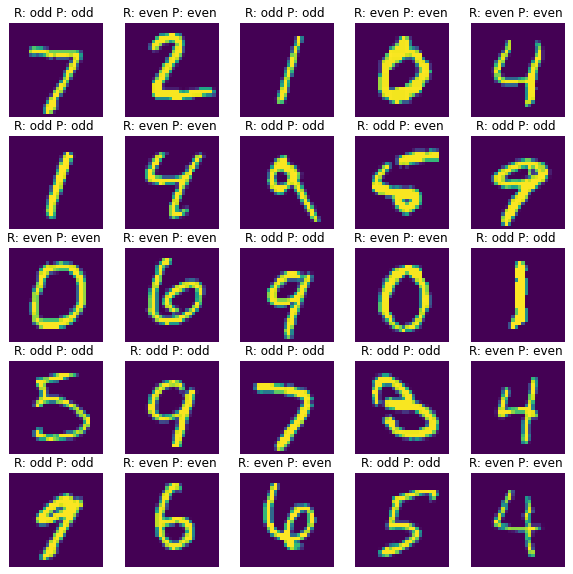

In [44]:
%matplotlib inline
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    # 실제 값 
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    # 예측 값 
    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '  
        
    sub_plt.set_title(sub_plt_title)
    
plt.show()